<a href="https://colab.research.google.com/github/mgalihpp/Analisis-Sentimen/blob/main/Analisis_Sentimen_Ulasan_Pengguna_Aplikasi_E_commerce_Itemku_Menggunakan_Algoritma_Support_Vector_Machine_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-play-scraper
!pip install Sastrawi

In [ ]:
from google_play_scraper import reviews_all

result = reviews_all(
    'com.fivejack.itemku.v2',
    lang='id',
    country='id',
)

print(result)

[{'reviewId': '56b6e286-4226-4b42-b2bc-39ceb6144c96', 'userName': 'Pengguna Google', 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g', 'content': '6ribu doang di bawa kabur aplikasi miskin.!!! alasan berbelit2', 'score': 1, 'thumbsUpCount': 1, 'reviewCreatedVersion': '1.0.7', 'at': datetime.datetime(2025, 11, 30, 17, 21, 9), 'replyContent': 'Halo Sam Maha!\n\nKami mohon maaf atas kendala yang kamu alami.\n\nSilakan informasikan nomor pesanan dan detail masalah kamu di support@itemku.com, tim kami akan segera membantu menyelesaikan permasalahan kamu.\n\nTerima kasih, kami tunggu laporan kamu ya! :D', 'repliedAt': datetime.datetime(2025, 11, 30, 17, 22, 45), 'appVersion': '1.0.7'}, {'reviewId': '5551e527-c4ec-430f-b5a8-4c9762db1385', 'userName': 'Pengguna Google', 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g', 'co

In [ ]:
import pandas as pd

# df = pd.DataFrame(result)

# # Simpan kolom penting saja
# df = df[['content', 'score', 'at', 'thumbsUpCount']]

# df.to_csv("itemku_reviews.csv", index=False)

# print("CSV berhasil dibuat.")

df = pd.DataFrame(result)

df = df[['content', 'score', 'at', 'thumbsUpCount']]

df = df.head(100)

df.to_csv("itemku_reviews.csv", index=False)


In [ ]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

stemmer = StemmerFactory().create_stemmer()
stopwords = StopWordRemoverFactory().create_stop_word_remover()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = stopwords.remove(text)
    text = stemmer.stem(text)
    return text

df['clean_text'] = df['content'].apply(preprocess)


In [ ]:
def label_sentiment(score):
    if score <= 2:
        return 'negatif'
    elif score == 3:
        return 'netral'
    else:
        return 'positif'

df['sentiment'] = df['score'].apply(label_sentiment)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = tfidf.fit_transform(df['clean_text'])
y = df['sentiment']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)


LinearSVC()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

     negatif       0.61      1.00      0.76        11
      netral       0.00      0.00      0.00         2
     positif       1.00      0.29      0.44         7

    accuracy                           0.65        20
   macro avg       0.54      0.43      0.40        20
weighted avg       0.69      0.65      0.57        20

[[11  0  0]
 [ 2  0  0]
 [ 5  0  2]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
df['predicted_sentiment'] = model.predict(X)
print(df['predicted_sentiment'].value_counts())


predicted_sentiment
negatif    71
positif    24
netral      5
Name: count, dtype: int64


In [ ]:
df['predicted_sentiment'].value_counts(normalize=True) * 100


,proportion
predicted_sentiment,
negatif,71.0
positif,24.0
netral,5.0


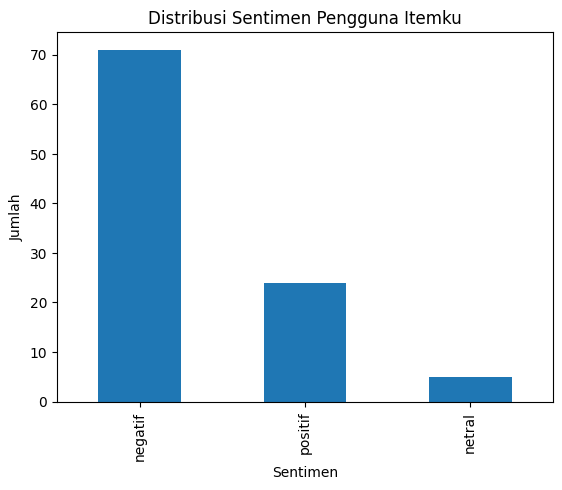

In [ ]:
import matplotlib.pyplot as plt

df['predicted_sentiment'].value_counts().plot(kind='bar')
plt.title("Distribusi Sentimen Pengguna Itemku")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.show()
